In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### Создание трех датасетов с "качественными данными"

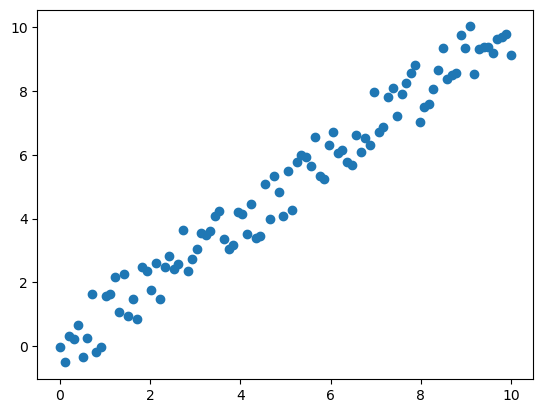

In [2]:
xs_1 = np.linspace(0, 10, 100)
ys_1 = xs_1 + np.random.random(100)*2-1

plt.scatter(xs_1, ys_1)
plt.show()

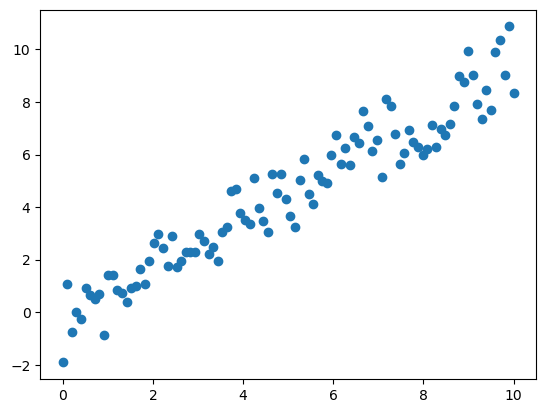

In [3]:
xs_2 = np.linspace(0, 10, 100)
ys_2 = xs_2 + np.random.random(100)*3-2

plt.scatter(xs_2, ys_2)
plt.show()

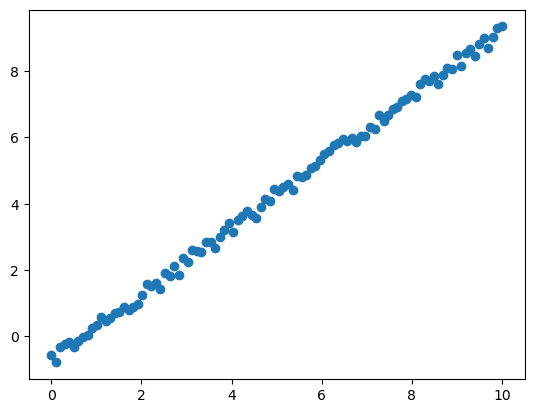

In [4]:
xs_3 = np.linspace(0, 10, 100)
ys_3 = xs_3 + np.random.random(100)*0.5-1

plt.scatter(xs_3, ys_3)
plt.show()

#### Обучение модели линейной регрессии на 1 датасете

In [5]:
model = LinearRegression(fit_intercept=False)
reg = model.fit(xs_1.reshape(-1, 1), ys_1)
# res = round(model.score(xs_1, ys_1),3)

#### Создание датасета с шумом в данных

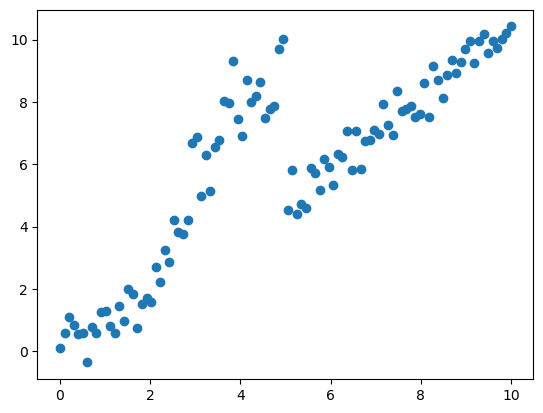

In [6]:
xs_4 = np.linspace(0, 10, 100)
ys_4 = xs_4 + np.random.random(100)*2-1
ys_4[25:50] *= 2

plt.scatter(xs_4, ys_4)
plt.show()

In [7]:
# Функция оценки модели
def regression_report(model, x_test, y_test):
    y_predict = model.predict(x_test.reshape(-1,1))
    
    fig1,ax1 = plt.subplots()
    ax1.scatter(x = x_test, y = y_test)
    ax1.plot(x_test.reshape(-1, 1), y_predict, color='red')
    ax1.set_xlabel('xs', fontsize=12)
    ax1.set_ylabel('ys', fontsize=12)
    fig1.set_size_inches(8,6)
    ax1.grid()
    
    print('Ошибка на тестовых данных')
    print('MSE: %.1f' % mse(y_test,y_predict))
    print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
    print('R2 : %.4f' %  r2_score(y_test,y_predict))
    
    np.savetxt(f"y_test.csv", y_test, delimiter=",")
    np.savetxt(f"y_predict.csv", y_predict, delimiter=",")

In [8]:
%%writefile test.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

@pytest.fixture()
def y_test():
    y_test = np.loadtxt(f"y_test.csv", delimiter=",")
    return y_test

@pytest.fixture()
def y_predict():
    y_predict = np.loadtxt(f"y_predict.csv", delimiter=",")
    return y_predict

def test_mse(y_test, y_predict):
    assert mse(y_test, y_predict) < 1, f"FAILED"
        
def test_rmse(y_test, y_predict):
    assert mse(y_test, y_predict,squared=False) < 1, f"FAILED"

def test_r2(y_test, y_predict):
    assert r2_score(y_test, y_predict) > 0.8, f"FAILED"

Overwriting test.py


#### Датасет 1

Ошибка на тестовых данных
MSE: 0.3
RMSE: 0.6
R2 : 0.9639
============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\AMatycin\AppData\Local\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\AMatycin\Desktop\learn\MLops\hw5
plugins: anyio-3.5.0
collecting ... collected 3 items

test.py::test_mse PASSED                                                 [ 33%]
test.py::test_rmse PASSED                                                [ 66%]
test.py::test_r2 PASSED                                                  [100%]

============================== 3 passed in 1.08s ==============================


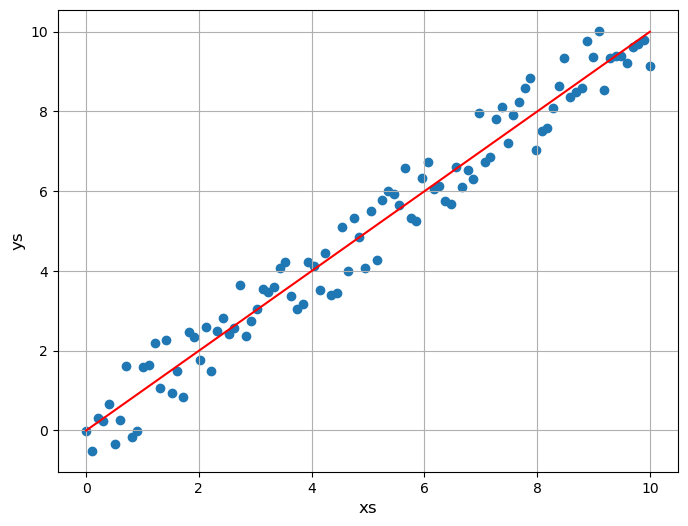

In [9]:
regression_report(model, xs_1, ys_1)
!pytest -v test.py

#### Датасет 2

Ошибка на тестовых данных
MSE: 0.9
RMSE: 1.0
R2 : 0.8867
============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\AMatycin\AppData\Local\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\AMatycin\Desktop\learn\MLops\hw5
plugins: anyio-3.5.0
collecting ... collected 3 items

test.py::test_mse PASSED                                                 [ 33%]
test.py::test_rmse PASSED                                                [ 66%]
test.py::test_r2 PASSED                                                  [100%]

============================== 3 passed in 1.04s ==============================


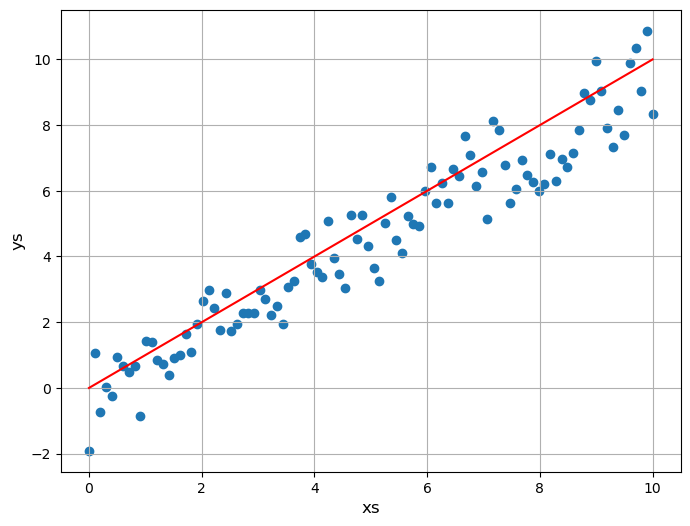

In [10]:
regression_report(model, xs_2, ys_2)
!pytest -v test.py

#### Датасет 3

Ошибка на тестовых данных
MSE: 0.5
RMSE: 0.7
R2 : 0.9380
============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\AMatycin\AppData\Local\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\AMatycin\Desktop\learn\MLops\hw5
plugins: anyio-3.5.0
collecting ... collected 3 items

test.py::test_mse PASSED                                                 [ 33%]
test.py::test_rmse PASSED                                                [ 66%]
test.py::test_r2 PASSED                                                  [100%]

============================== 3 passed in 1.08s ==============================


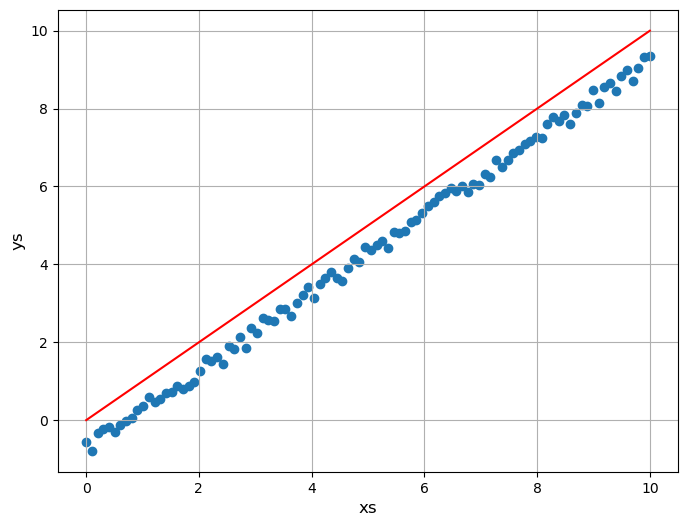

In [11]:
regression_report(model, xs_3, ys_3)
!pytest -v test.py

#### Датасет 4

Ошибка на тестовых данных
MSE: 3.2
RMSE: 1.8
R2 : 0.6629
============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\AMatycin\AppData\Local\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\AMatycin\Desktop\learn\MLops\hw5
plugins: anyio-3.5.0
collecting ... collected 3 items

test.py::test_mse FAILED                                                 [ 33%]
test.py::test_rmse FAILED                                                [ 66%]
test.py::test_r2 FAILED                                                  [100%]

================================== FAILURES ===================================
__________________________________ test_mse ___________________________________

y_test = array([ 0.11292338,  0.57030376,  1.08943668,  0.85003193,  0.56541331,
        0.58404903, -0.36235032,  0.78649199, ...297972,  9.94474655, 10.18024413,  9.57163814,
        9.9672896 ,  9.7196032 , 10.03

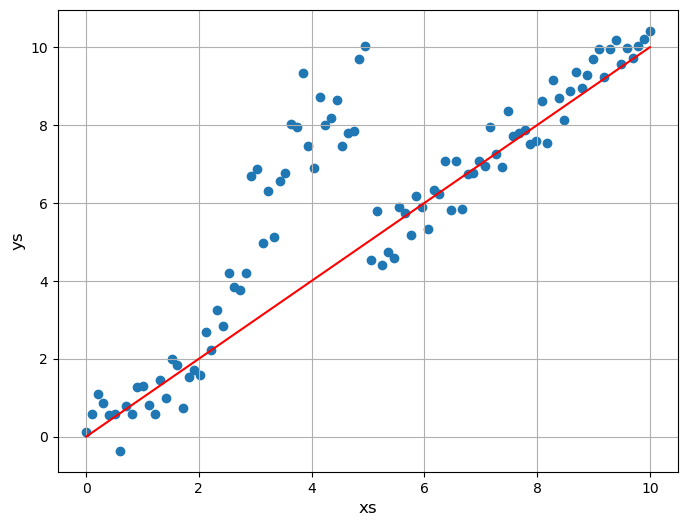

In [12]:
regression_report(model, xs_4, ys_4)
!pytest -v test.py

- Исследовав графики и значения по трем метрикам - видны проблемы на 4 датасете с шумами
- C помощью Pytest - удалось выявить, что в 4 датасете провалились все тесты, а во 2 датасете по метрикам mse и rmse
- Однако на 3 датасете все тесты успешные, но из-за небольшого диапазона разброса данных, нельзя сказать, что прогноз удовлетворительный.